# **cultivos**

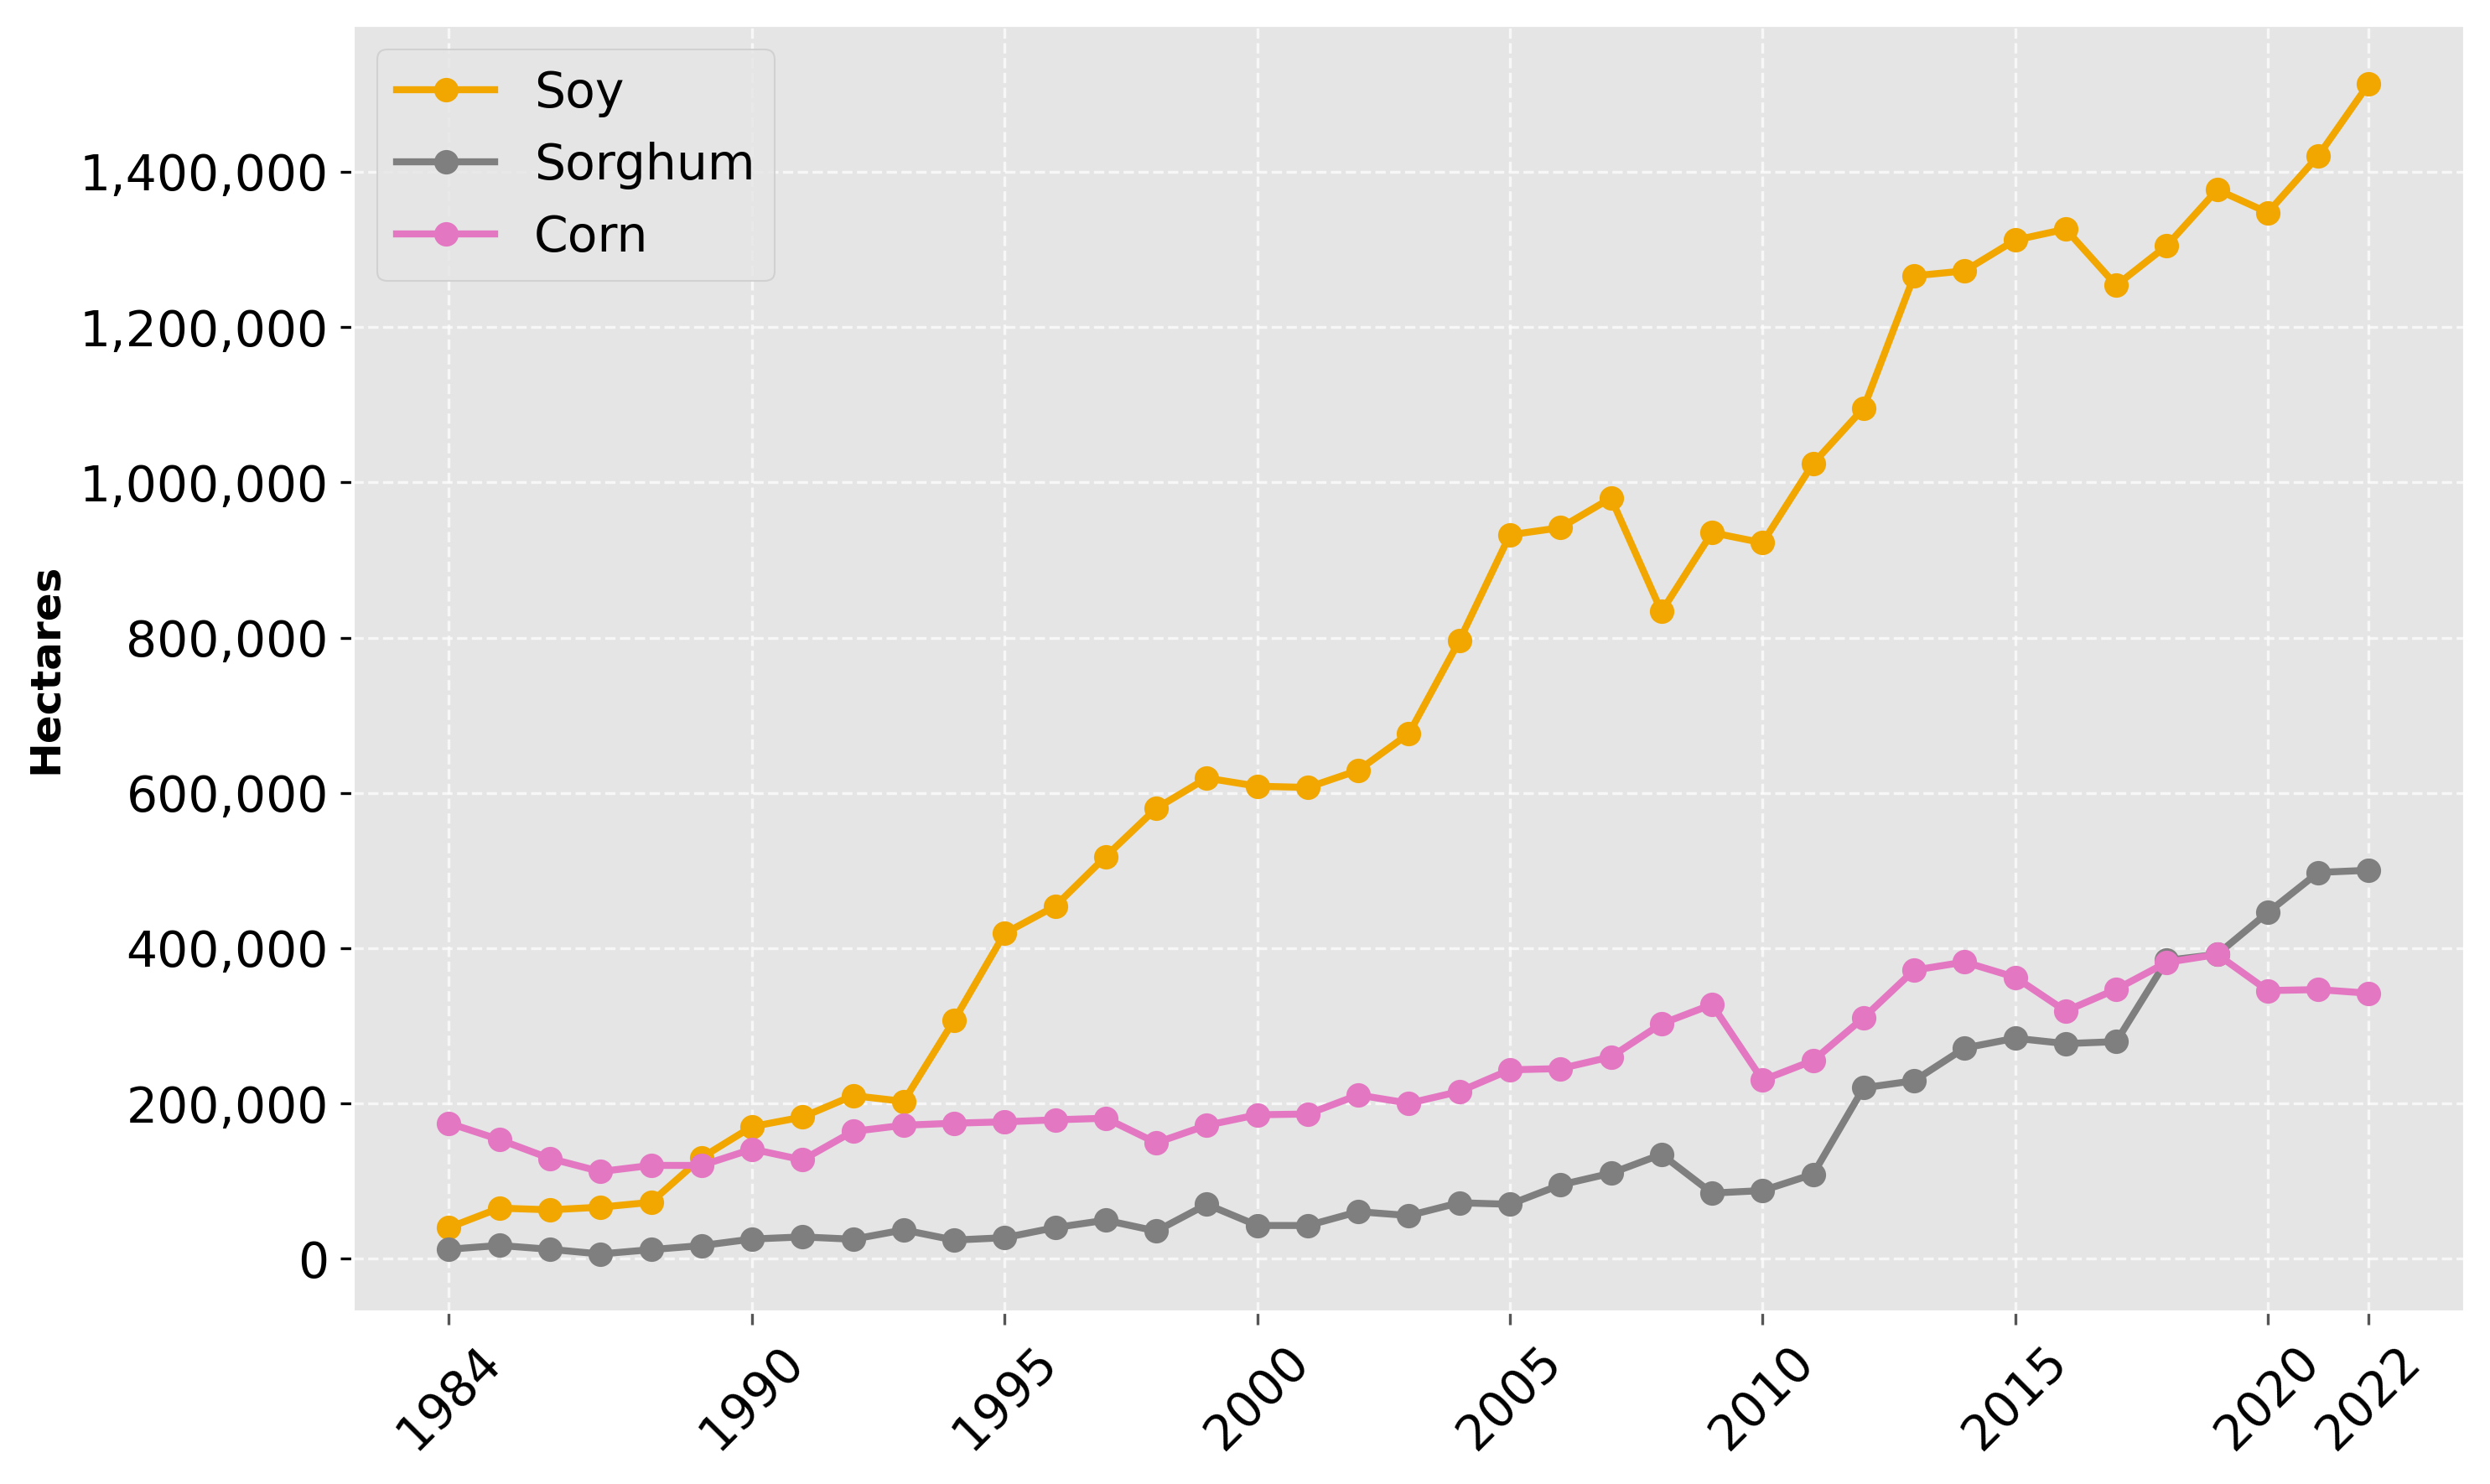

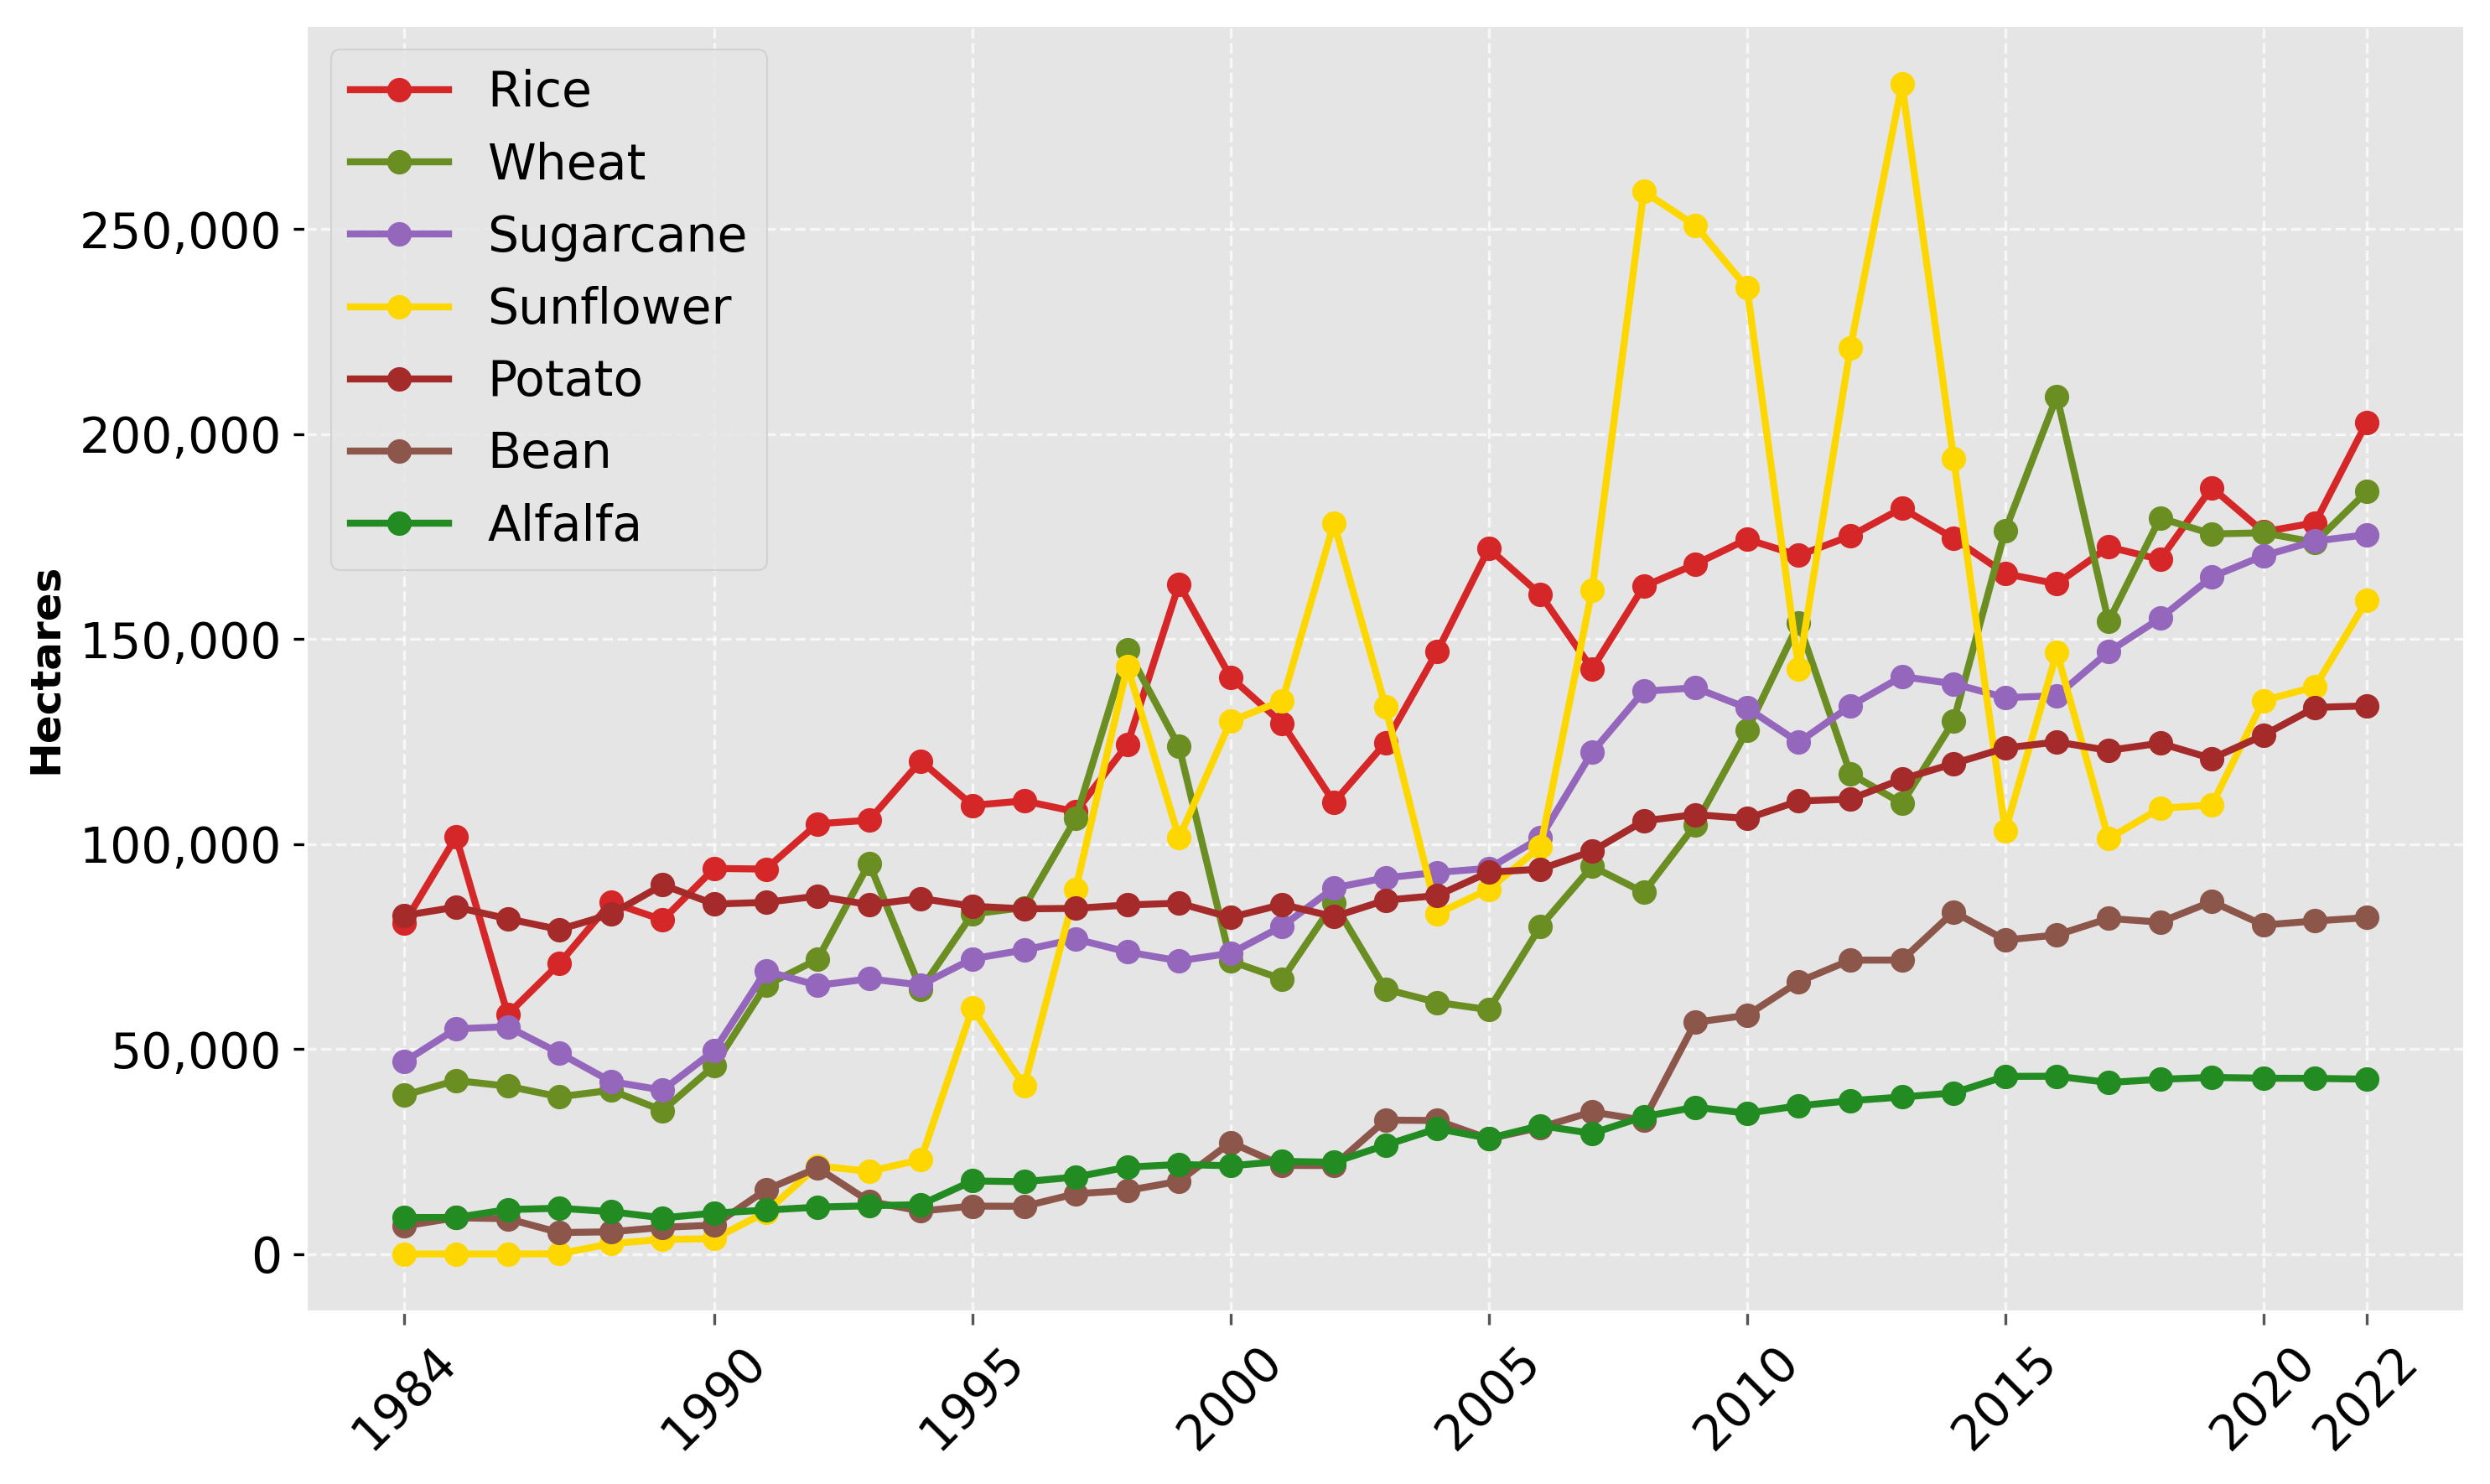

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Aplicar estilo ggplot
plt.style.use('ggplot')

# Cargar el archivo Excel
data = pd.read_excel('/content/drive/MyDrive/PROYECTOS-CONSULTORIA/BID/datos_inicio/cultivos_bolivia.xlsx')

ColombiaAmazonas = data.copy()

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    "Palma Africana (Fruta Fresca)": "Oil palm",
    "Maíz": "Corn",
    "Arroz con cáscara": "Rice",
    "Soya": "Soy",
    "Plátano (Fruta Fresca)": "Plantain",
    'Caña de Azúcar': 'Sugarcane',
    'Caña De Azúcar Para Otros Usos (Tallo Fresco)': 'Sugarcane',
    "Yuca (Raíz Fresca)": "Yuca",
    "Cacao (Almendra Seca)": "Cocoa",
    "MARAÑÓN": "Cashew",
    "Café (Grano Oro)": "Coffee",
    'Sorgo en grano': 'Sorghum',
    'Trigo': 'Wheat',
    'Girasol': 'Sunflower',
    'Papa': 'Potato',
    'Frijol': 'Bean',
    'Alfalfa': 'Alfalfa',
    'Cebada': 'Barley',
    'Maíz Duro Seco (Grano Seco)': 'Corn',
    'Maíz Duro Choclo (En Choclo)': 'Corn',
    'Maíz Suave Choclo (En Choclo)': 'Corn',
    'Maíz Suave Seco (Grano Seco)': 'Corn',
    'Frijol/poroto': 'Bean',
    'Fréjol Tierno (En Vaina)': 'Bean',
    'Naranja (Fruta Fresca)': 'Orange',
    'Orito (Fruta Fresca)' : 'Orito',
    'Maíz en grano' : 'Corn',
    'Alfalfa' : 'Alfalfa'

}

# Reemplazar las etiquetas en la columna 'Cultivo'
ColombiaAmazonas['Cultivo'] = ColombiaAmazonas['Cultivo'].replace(traducciones)

# Filtrar la información del año 2023
ColombiaAmazonas_2022 = ColombiaAmazonas[ColombiaAmazonas['Año'] == 2022]

# Determinar los 10 principales cultivos para el año 2022
top10_cultivos_2022 = ColombiaAmazonas_2022.groupby('Cultivo')['Área'].sum().nlargest(10)

# Filtrar el dataframe para incluir solo los 10 principales cultivos
ColombiaAmazonas_top10 = ColombiaAmazonas[ColombiaAmazonas['Cultivo'].isin(top10_cultivos_2022.index)]

# Función para formatear los números en miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Determinar el rango de años en los datos
min_year = ColombiaAmazonas_top10['Año'].min()
max_year = int(ColombiaAmazonas_top10['Año'].max())  # Convertir a entero para evitar problemas

# Paleta de colores personalizada
colors = {
    'Açaí': '#1f77b4',       # azul
    'Cotton': '#2ca02c',      # verde
    'Rice': '#d62728',        # rojo
    'Sugarcane': '#9467bd',   # morado
    'Oil palm': '#ff7f0e',    # naranja
    'Bean': '#8c564b',        # marrón
    'Corn': '#e377c2',        # rosa
    'Yuca': '#17becf',        # cyan
    'Soy': '#f2a700',         # amarillo
    'Sorghum': '#7f7f7f',     # gris
    'Plantain': '#bcbd22',    # verde oliva
    'Cocoa': '#17a2b8',       # azul acero
    'Cashew': '#c49c94',      # marrón claro
    'Coffee': '#8b4513',      # marrón oscuro (siena quemada)
    'Wheat': '#6b8e23',       # verde oliva oscuro
    'Sunflower': '#ffd700',   # dorado
    'Potato': '#a52a2a',      # marrón rojizo
    'Alfalfa': '#228b22',     # verde bosque
    'Barley': '#deb887',      # marrón beige
    'Orange': '#FFA500',       # naranja
    'Orito': '#FFD700'  #
}

# Cultivos para cada gráfico
cultivos_1 = ['Soy','Sorghum', 'Corn']
cultivos_2 = [cultivo for cultivo in top10_cultivos_2022.index if cultivo not in cultivos_1]

# Crear el primer gráfico
plt.figure(figsize=(10, 6), dpi=300)
for cultivo in cultivos_1:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    plt.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

plt.ylabel('Hectares', fontweight='bold', color='black')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Configurar las etiquetas del eje X para incluir 1986, múltiplos de 5, y el último año 2022
years = [1984] + list(range(1990, 2023, 5)) + [2022]
plt.xticks(years, rotation=45, color='black', fontsize=14)
plt.tick_params(axis='y', colors='black', labelsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PROYECTOS-CONSULTORIA/BID/figuras/cultivos_bolivia_grafico1.png', dpi=300)
plt.show()

# Crear el segundo gráfico
plt.figure(figsize=(10, 6), dpi=300)
for cultivo in cultivos_2:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    plt.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

plt.ylabel('Hectares', fontweight='bold', color='black')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
# Configurar las etiquetas del eje X para incluir 1986, múltiplos de 5, y el último año 2022
years = [1984] + list(range(1990, 2023, 5)) + [2022]
plt.xticks(years, rotation=45, color='black', fontsize=14)
plt.tick_params(axis='y', colors='black', labelsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/PROYECTOS-CONSULTORIA/BID/figuras/cultivos_bolivia_grafico2.png', dpi=300)
plt.show()

# **CULTIVO DOBLE**

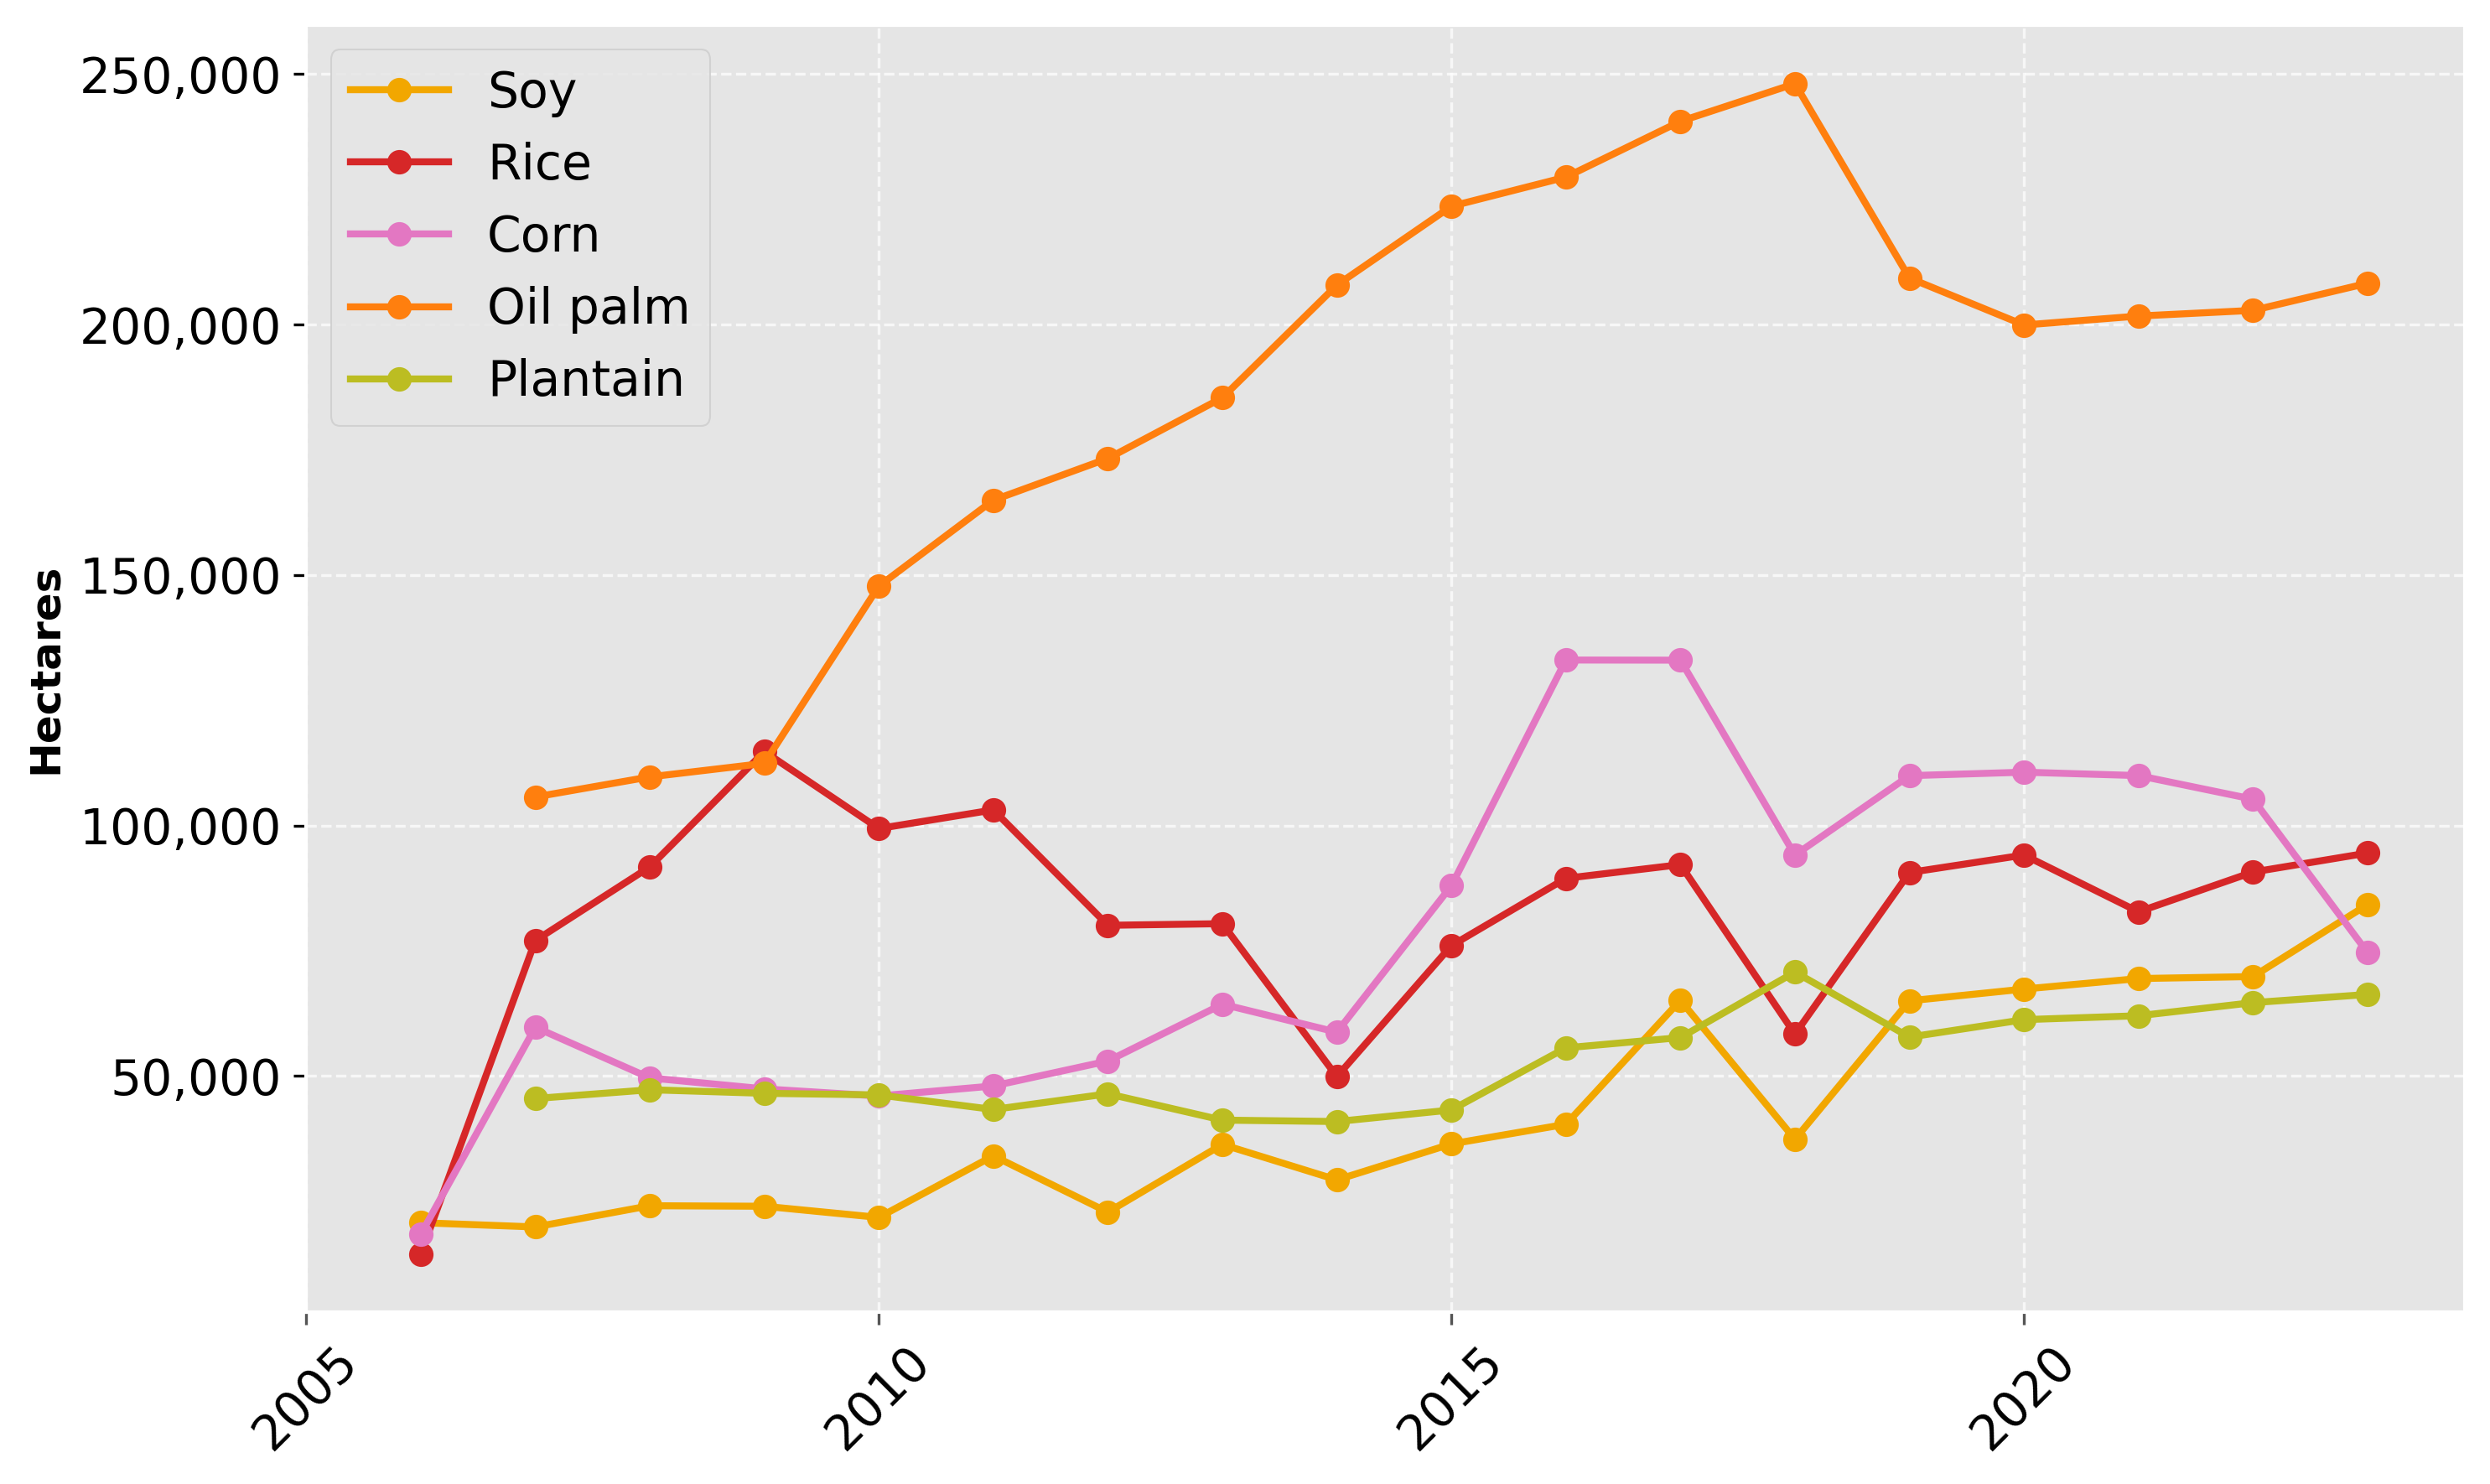

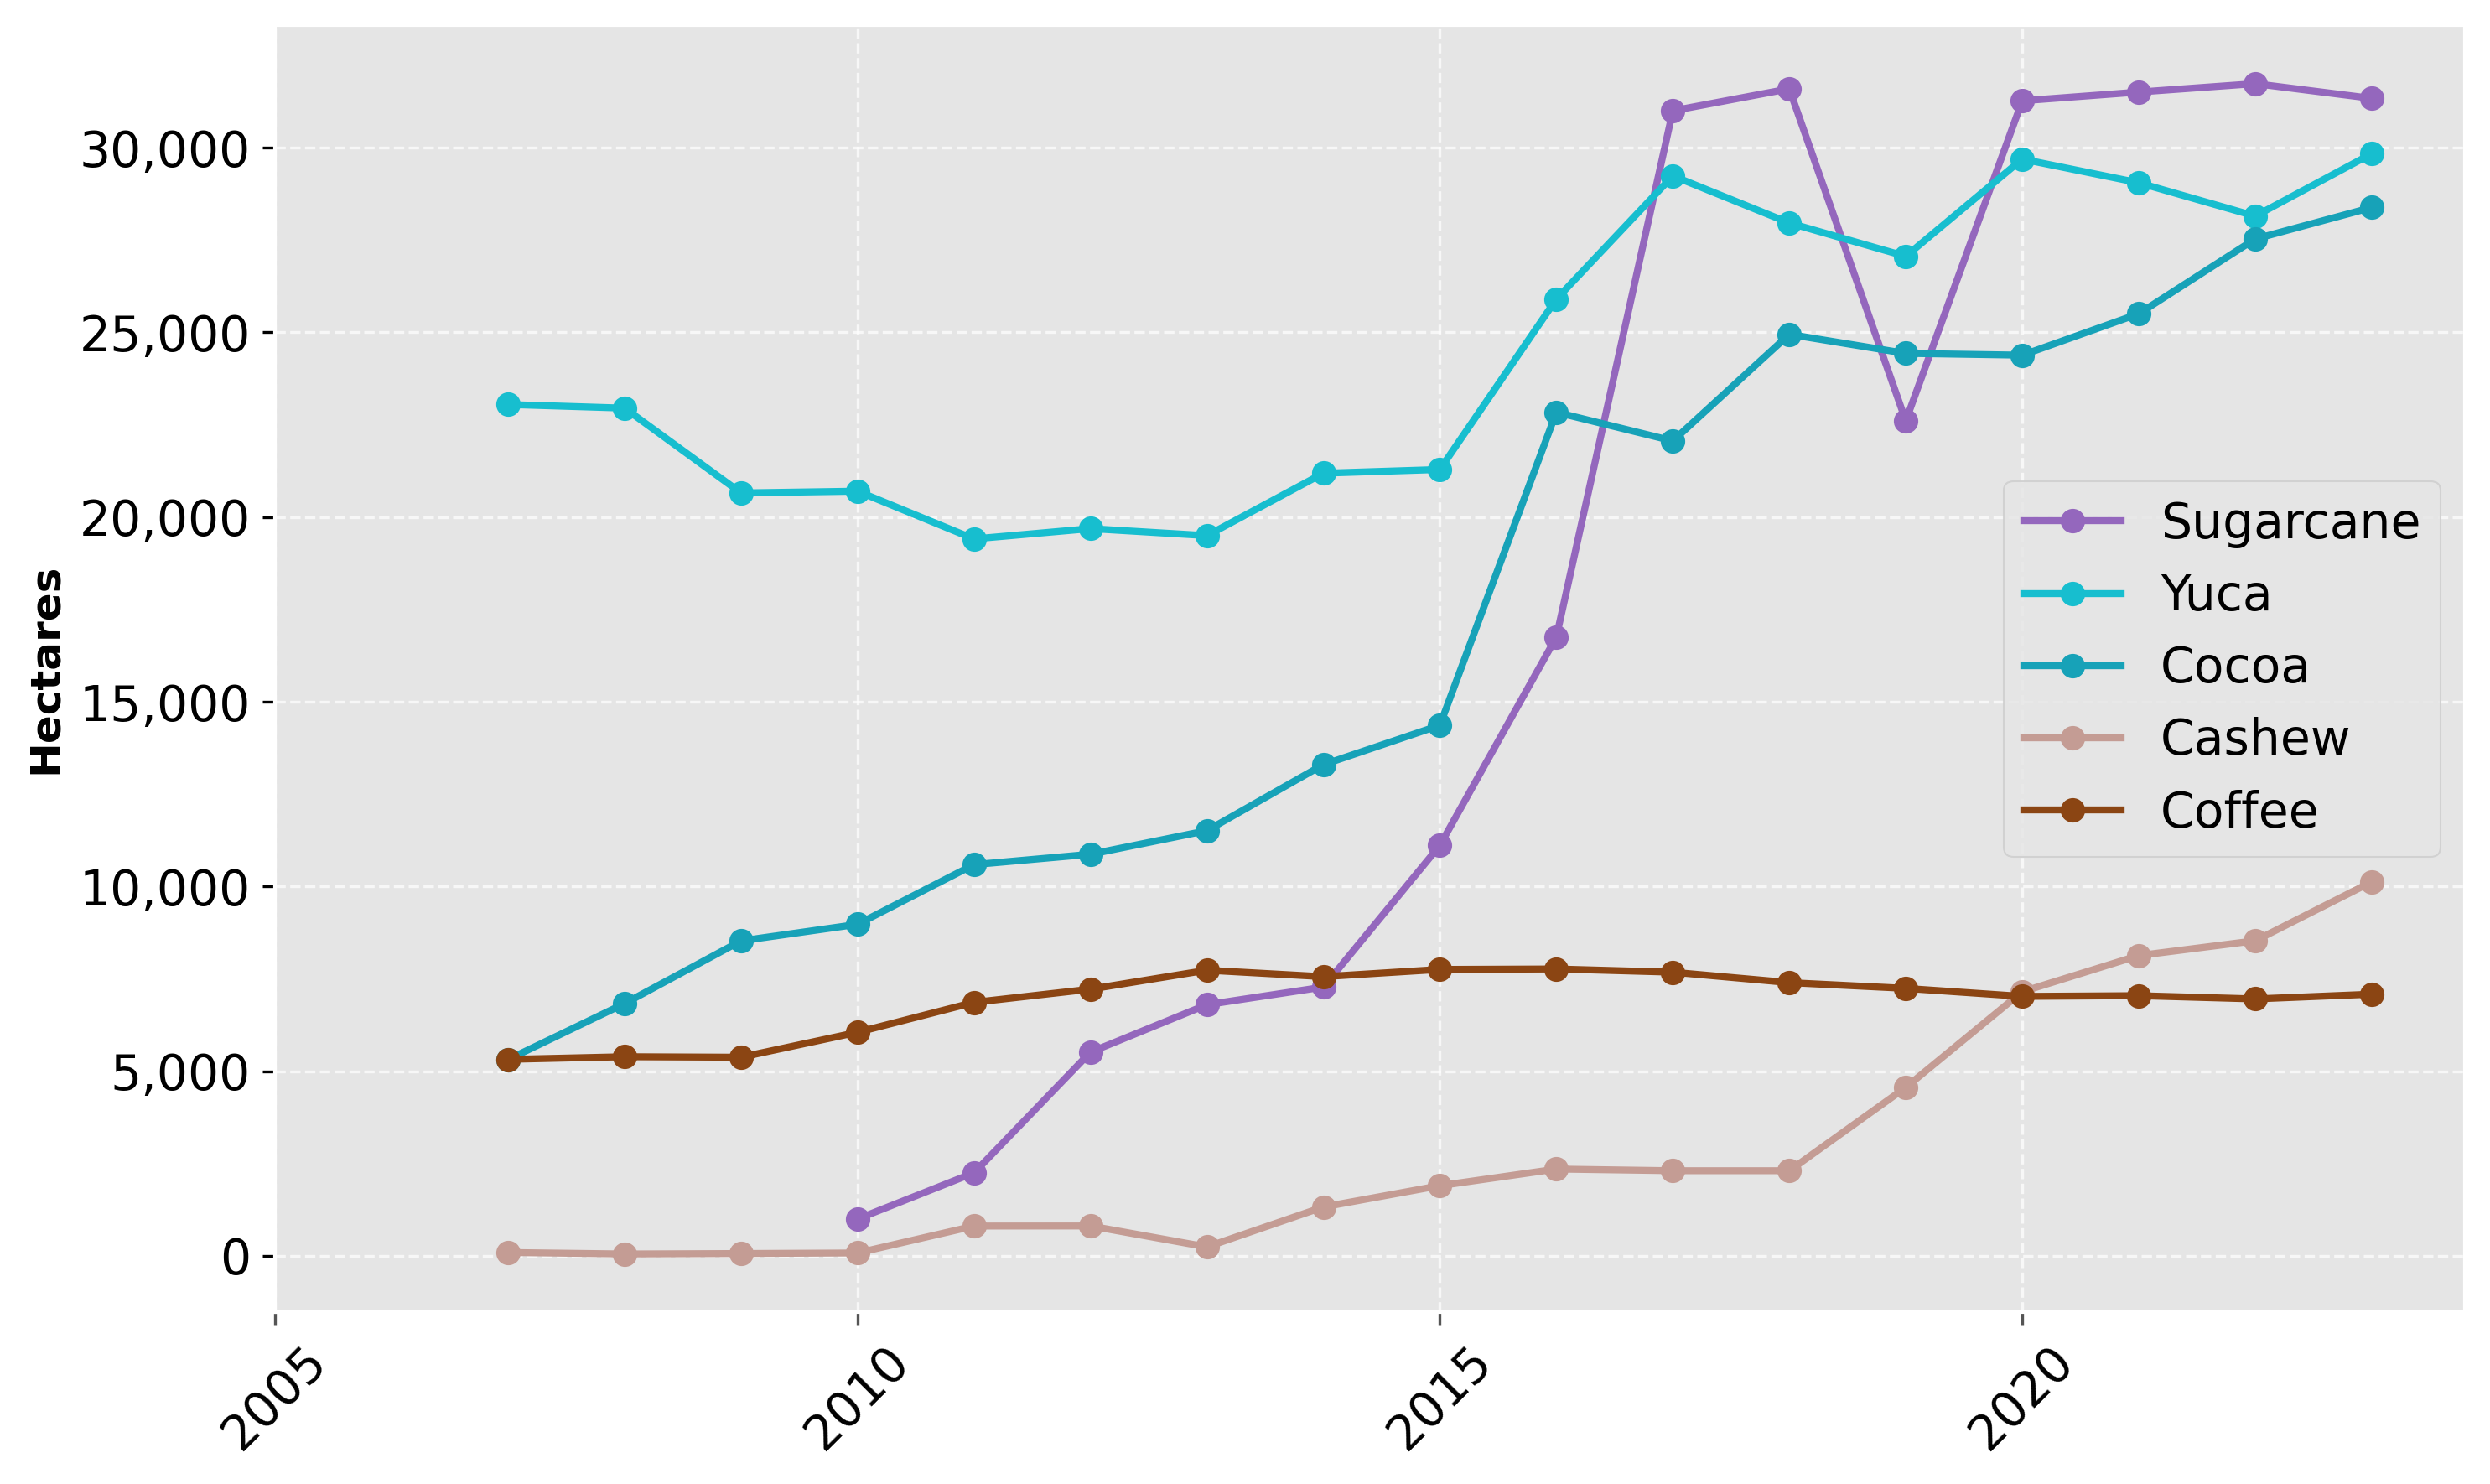

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Aplicar estilo ggplot
plt.style.use('ggplot')

# Cargar el archivo Excel
data = pd.read_excel('/content/drive/MyDrive/BID/datos_inicio/cultivos_bolivia.xlsx')

ColombiaAmazonas = data.copy()

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    "PALMA DE ACEITE": "Oil palm",
    "MAÍZ": "Corn",
    "ARROZ": "Rice",
    "SOYA": "Soy",
    "PLÁTANO": "Plantain",
    "CAÑA": "Sugarcane",
    "YUCA": "Yuca",
    "CACAO": "Cocoa",
    "MARAÑÓN": "Cashew",
    "CAFÉ": "Coffee"
}

# Reemplazar las etiquetas en la columna 'Cultivo'
ColombiaAmazonas['Cultivo'] = ColombiaAmazonas['Cultivo'].replace(traducciones)

# Filtrar la información del año 2023
ColombiaAmazonas_2022 = ColombiaAmazonas[ColombiaAmazonas['Año'] == 2023]

# Determinar los 10 principales cultivos para el año 2022
top10_cultivos_2022 = ColombiaAmazonas_2022.groupby('Cultivo')['Área'].sum().nlargest(10)

# Filtrar el dataframe para incluir solo los 10 principales cultivos
ColombiaAmazonas_top10 = ColombiaAmazonas[ColombiaAmazonas['Cultivo'].isin(top10_cultivos_2022.index)]

# Función para formatear los números en miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Determinar el rango de años en los datos
min_year = ColombiaAmazonas_top10['Año'].min()
max_year = ColombiaAmazonas_top10['Año'].max()

# Paleta de colores personalizada
colors = {
    'Açaí': '#1f77b4',  # azul
    'Cotton': '#2ca02c',  # verde
    'Rice': '#d62728',  # rojo
    'Sugarcane': '#9467bd',  # morado
    'Oil palm': '#ff7f0e',  # naranja
    'Bean': '#8c564b',  # marrón
    'Corn': '#e377c2',  # rosa
    'Yuca': '#17becf',  # cyan
    'Soy': '#f2a700',  # amarillo
    'Sorghum': '#7f7f7f',  # gris
    'Plantain': '#bcbd22',  # verde oliva
    'Cocoa': '#17a2b8',  # azul acero
    'Cashew': '#c49c94',  # marrón claro
    'Coffee': '#8b4513'  # marrón oscuro (siena quemada)
}

# Cultivos para cada gráfico
cultivos_1 = ['Soy', 'Rice', 'Corn', 'Oil palm', "Plantain"]
cultivos_2 = [cultivo for cultivo in top10_cultivos_2022.index if cultivo not in cultivos_1]

# Crear el primer gráfico
plt.figure(figsize=(10, 6), dpi=300)
for cultivo in cultivos_1:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    plt.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

plt.ylabel('Hectares', fontweight='bold', color='black')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(range(2005, max_year + 1, 5), rotation=45, color='black', fontsize=14)
plt.tick_params(axis='y', colors='black', labelsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BID/figuras/cultivos_colombia_grafico1.png', dpi=300)
plt.show()

# Crear el segundo gráfico
plt.figure(figsize=(10, 6), dpi=300)
for cultivo in cultivos_2:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    plt.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

plt.ylabel('Hectares', fontweight='bold', color='black')
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.xticks(range(2005, max_year + 1, 5), rotation=45, color='black', fontsize=14)
plt.tick_params(axis='y', colors='black', labelsize=14)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BID/figuras/cultivos_colombia_grafico2.png', dpi=300)
plt.show()


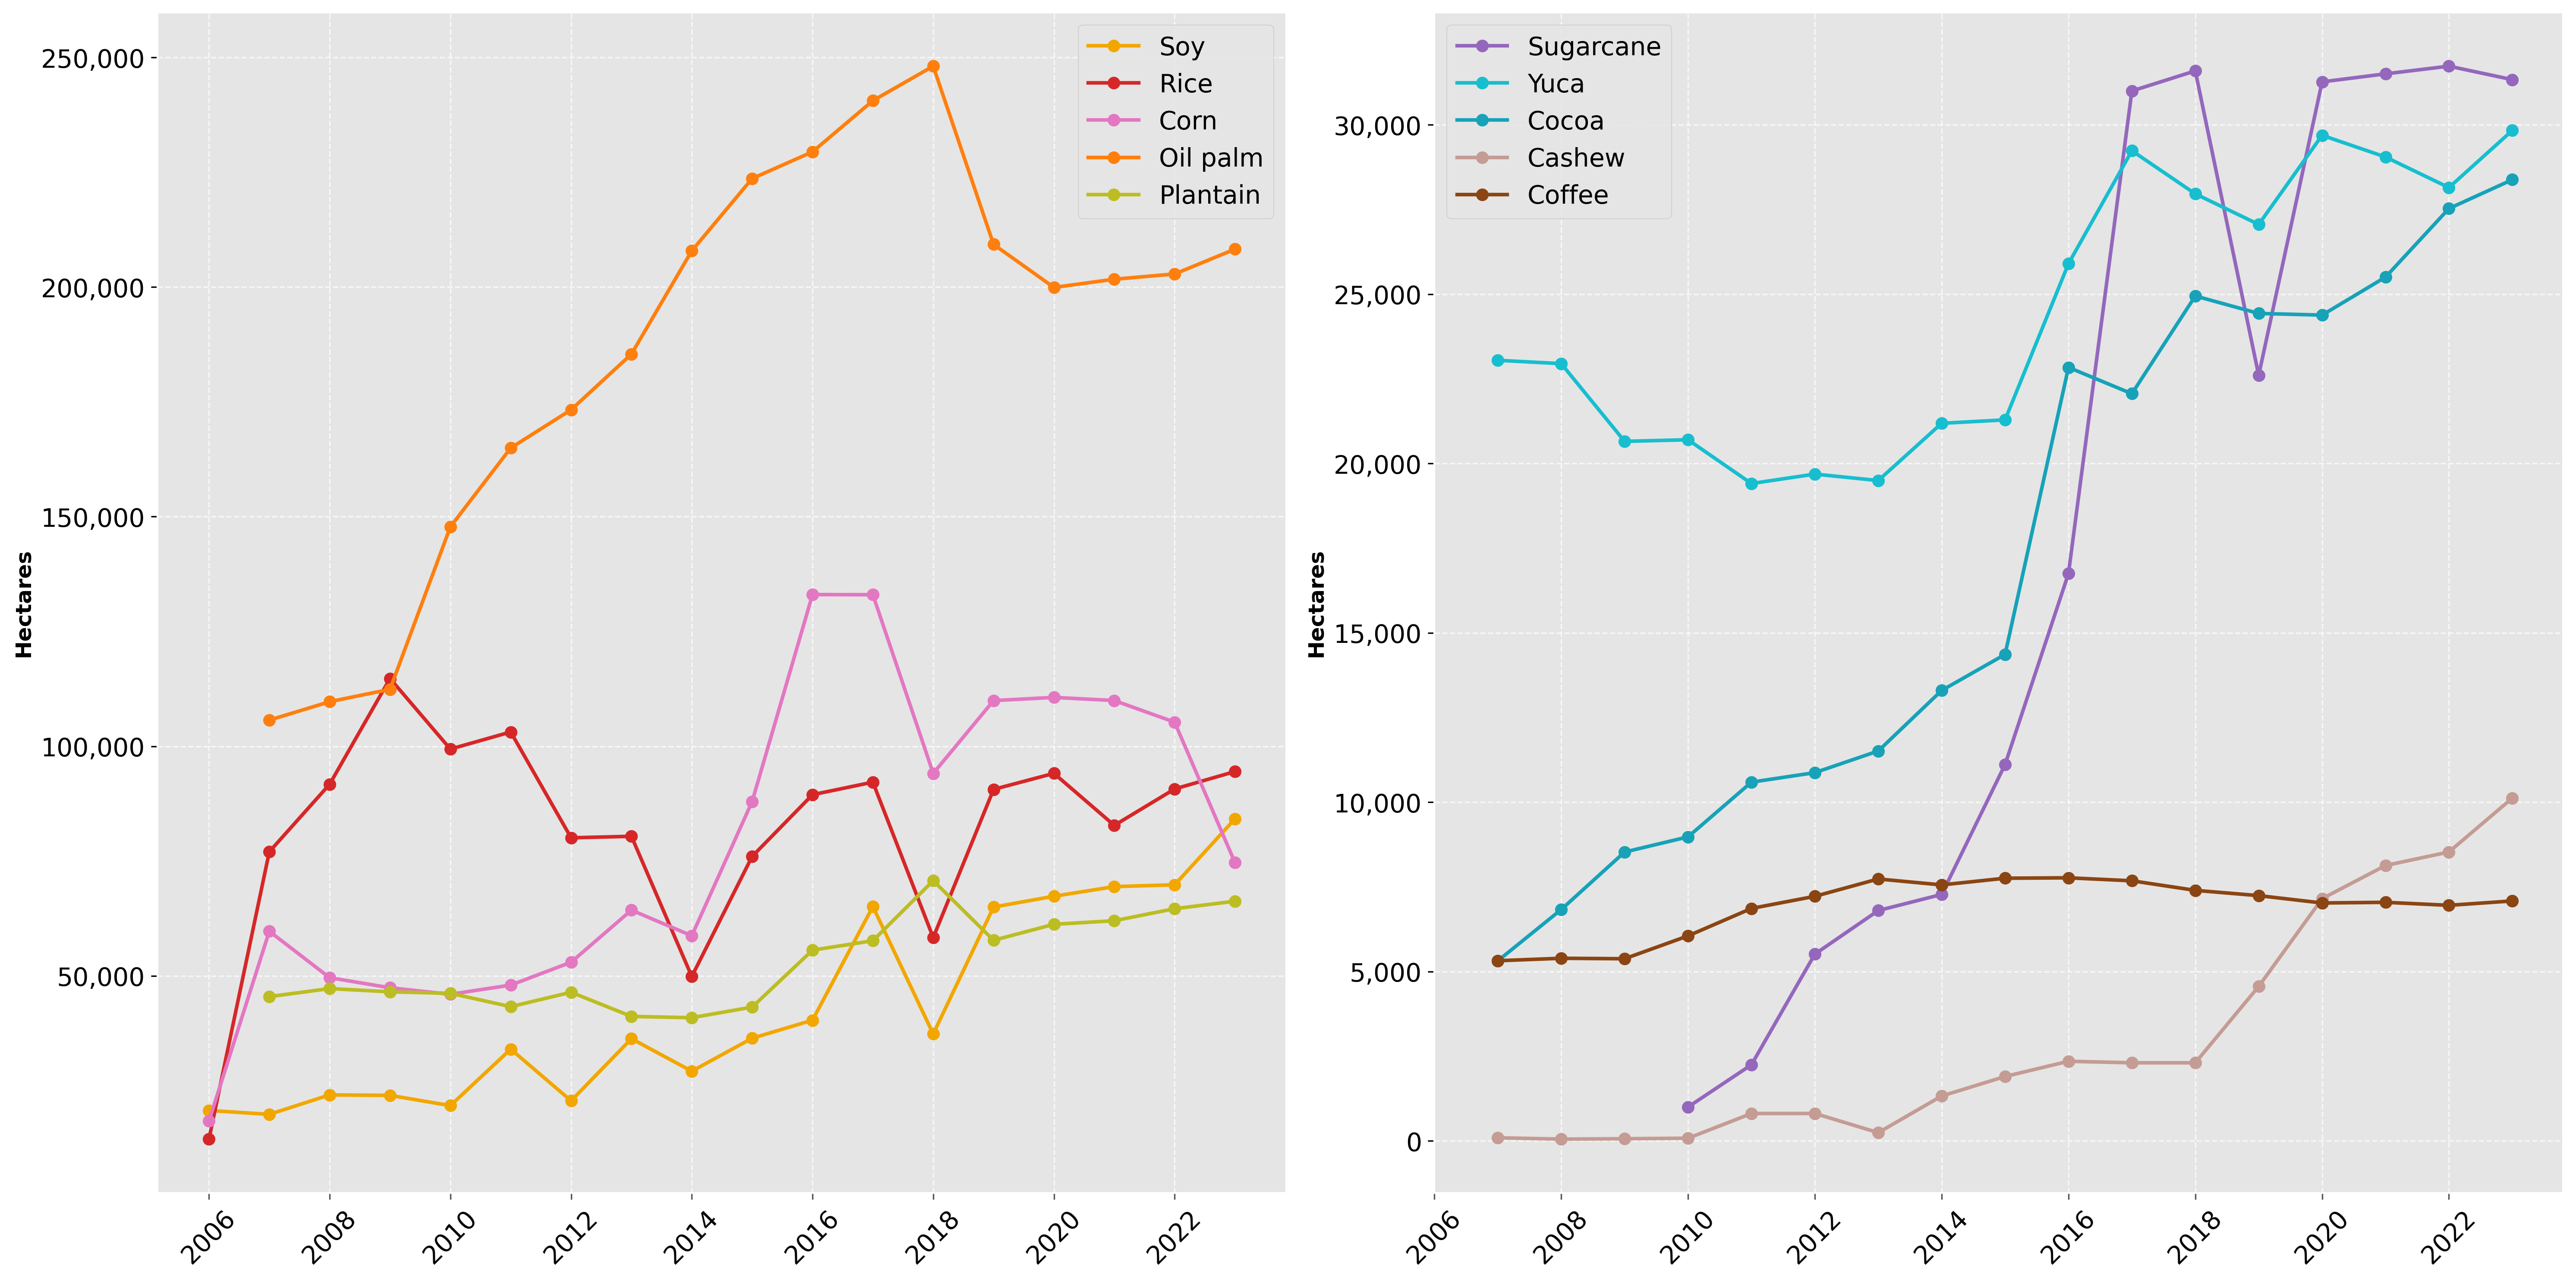

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Aplicar estilo ggplot
plt.style.use('ggplot')

# Cargar el archivo Excel
data = pd.read_excel('/content/drive/MyDrive/BID/datos_inicio/cultivos_colombia.xlsx')

ColombiaAmazonas = data.copy()

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    "PALMA DE ACEITE": "Oil palm",
    "MAÍZ": "Corn",
    "ARROZ": "Rice",
    "SOYA": "Soy",
    "PLÁTANO": "Plantain",
    "CAÑA": "Sugarcane",
    "YUCA": "Yuca",
    "CACAO": "Cocoa",
    "MARAÑÓN": "Cashew",
    "CAFÉ": "Coffee"
}

# Reemplazar las etiquetas en la columna 'Cultivo'
ColombiaAmazonas['Cultivo'] = ColombiaAmazonas['Cultivo'].replace(traducciones)

# Filtrar la información del año 2022
ColombiaAmazonas_2022 = ColombiaAmazonas[ColombiaAmazonas['Año'] == 2023]

# Determinar los 10 principales cultivos para el año 2022
top10_cultivos_2022 = ColombiaAmazonas_2022.groupby('Cultivo')['Área'].sum().nlargest(10)

# Filtrar el dataframe para incluir solo los 10 principales cultivos
ColombiaAmazonas_top10 = ColombiaAmazonas[ColombiaAmazonas['Cultivo'].isin(top10_cultivos_2022.index)]

ColombiaAmazonas_top10.to_excel('/content/drive/MyDrive/BID/resultados_datos/cultivos_colombia.xlsx', index=False)

# Función para formatear los números en miles
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Determinar el rango de años en los datos
min_year = ColombiaAmazonas_top10['Año'].min()
max_year = ColombiaAmazonas_top10['Año'].max()

# Paleta de colores personalizada
colors = {
    'Açaí': '#1f77b4',  # azul
    'Cotton': '#2ca02c',  # verde
    'Rice': '#d62728',  # rojo
    'Sugarcane': '#9467bd',  # morado
    'Oil palm': '#ff7f0e',  # naranja
    'Bean': '#8c564b',  # marrón
    'Corn': '#e377c2',  # rosa
    'Yuca': '#17becf',  # cyan
    'Soy': '#f2a700',  # amarillo
    'Sorghum': '#7f7f7f',  # gris
    'Plantain': '#bcbd22',  # verde oliva
    'Cocoa': '#17a2b8',  # azul acero
    'Cashew': '#c49c94',  # marrón claro
    'Coffee': '#8b4513'  # marrón oscuro (siena quemada)
    }

# Cultivos para los subplots
cultivos_1 = ['Soy', 'Rice', 'Corn', 'Oil palm', "Plantain"]
cultivos_2 = [cultivo for cultivo in top10_cultivos_2022.index if cultivo not in cultivos_1]
# Crear los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

# Primer subplot
for cultivo in cultivos_1:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    ax1.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

ax1.set_ylabel('Hectares', fontweight='bold', color='black')  # Etiqueta del eje Y en negro

#ax1.set_yscale('log')
ax1.legend(fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax1.set_xticks(range(min_year, max_year + 1, 2))
ax1.set_xticklabels(range(min_year, max_year + 1, 2), rotation=45, color='black', fontsize=14)  # Etiquetas del eje X en negro
ax1.tick_params(axis='y', colors='black', labelsize=14)  # Etiquetas del eje Y en negro

# Segundo subplot
for cultivo in cultivos_2:
    cultivo_data = ColombiaAmazonas_top10[ColombiaAmazonas_top10['Cultivo'] == cultivo]
    cultivo_data_agg = cultivo_data.groupby('Año')['Área'].sum()
    ax2.plot(cultivo_data_agg.index, cultivo_data_agg.values, marker='o', label=cultivo, color=colors[cultivo], linewidth=2)

ax2.set_ylabel('Hectares', fontweight='bold', color='black')  # Etiqueta del eje Y en negro

#ax2.set_yscale('log')
ax2.legend(fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax2.set_xticks(range(min_year, max_year + 1, 2))
ax2.set_xticklabels(range(min_year, max_year + 1, 2), rotation=45, color='black', fontsize=14)  # Etiquetas del eje X en negro
ax2.tick_params(axis='y', colors='black', labelsize=14)  # Etiquetas del eje Y en negro

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/BID/figuras/cultivos_colombia2.png', dpi=300)
plt.show()

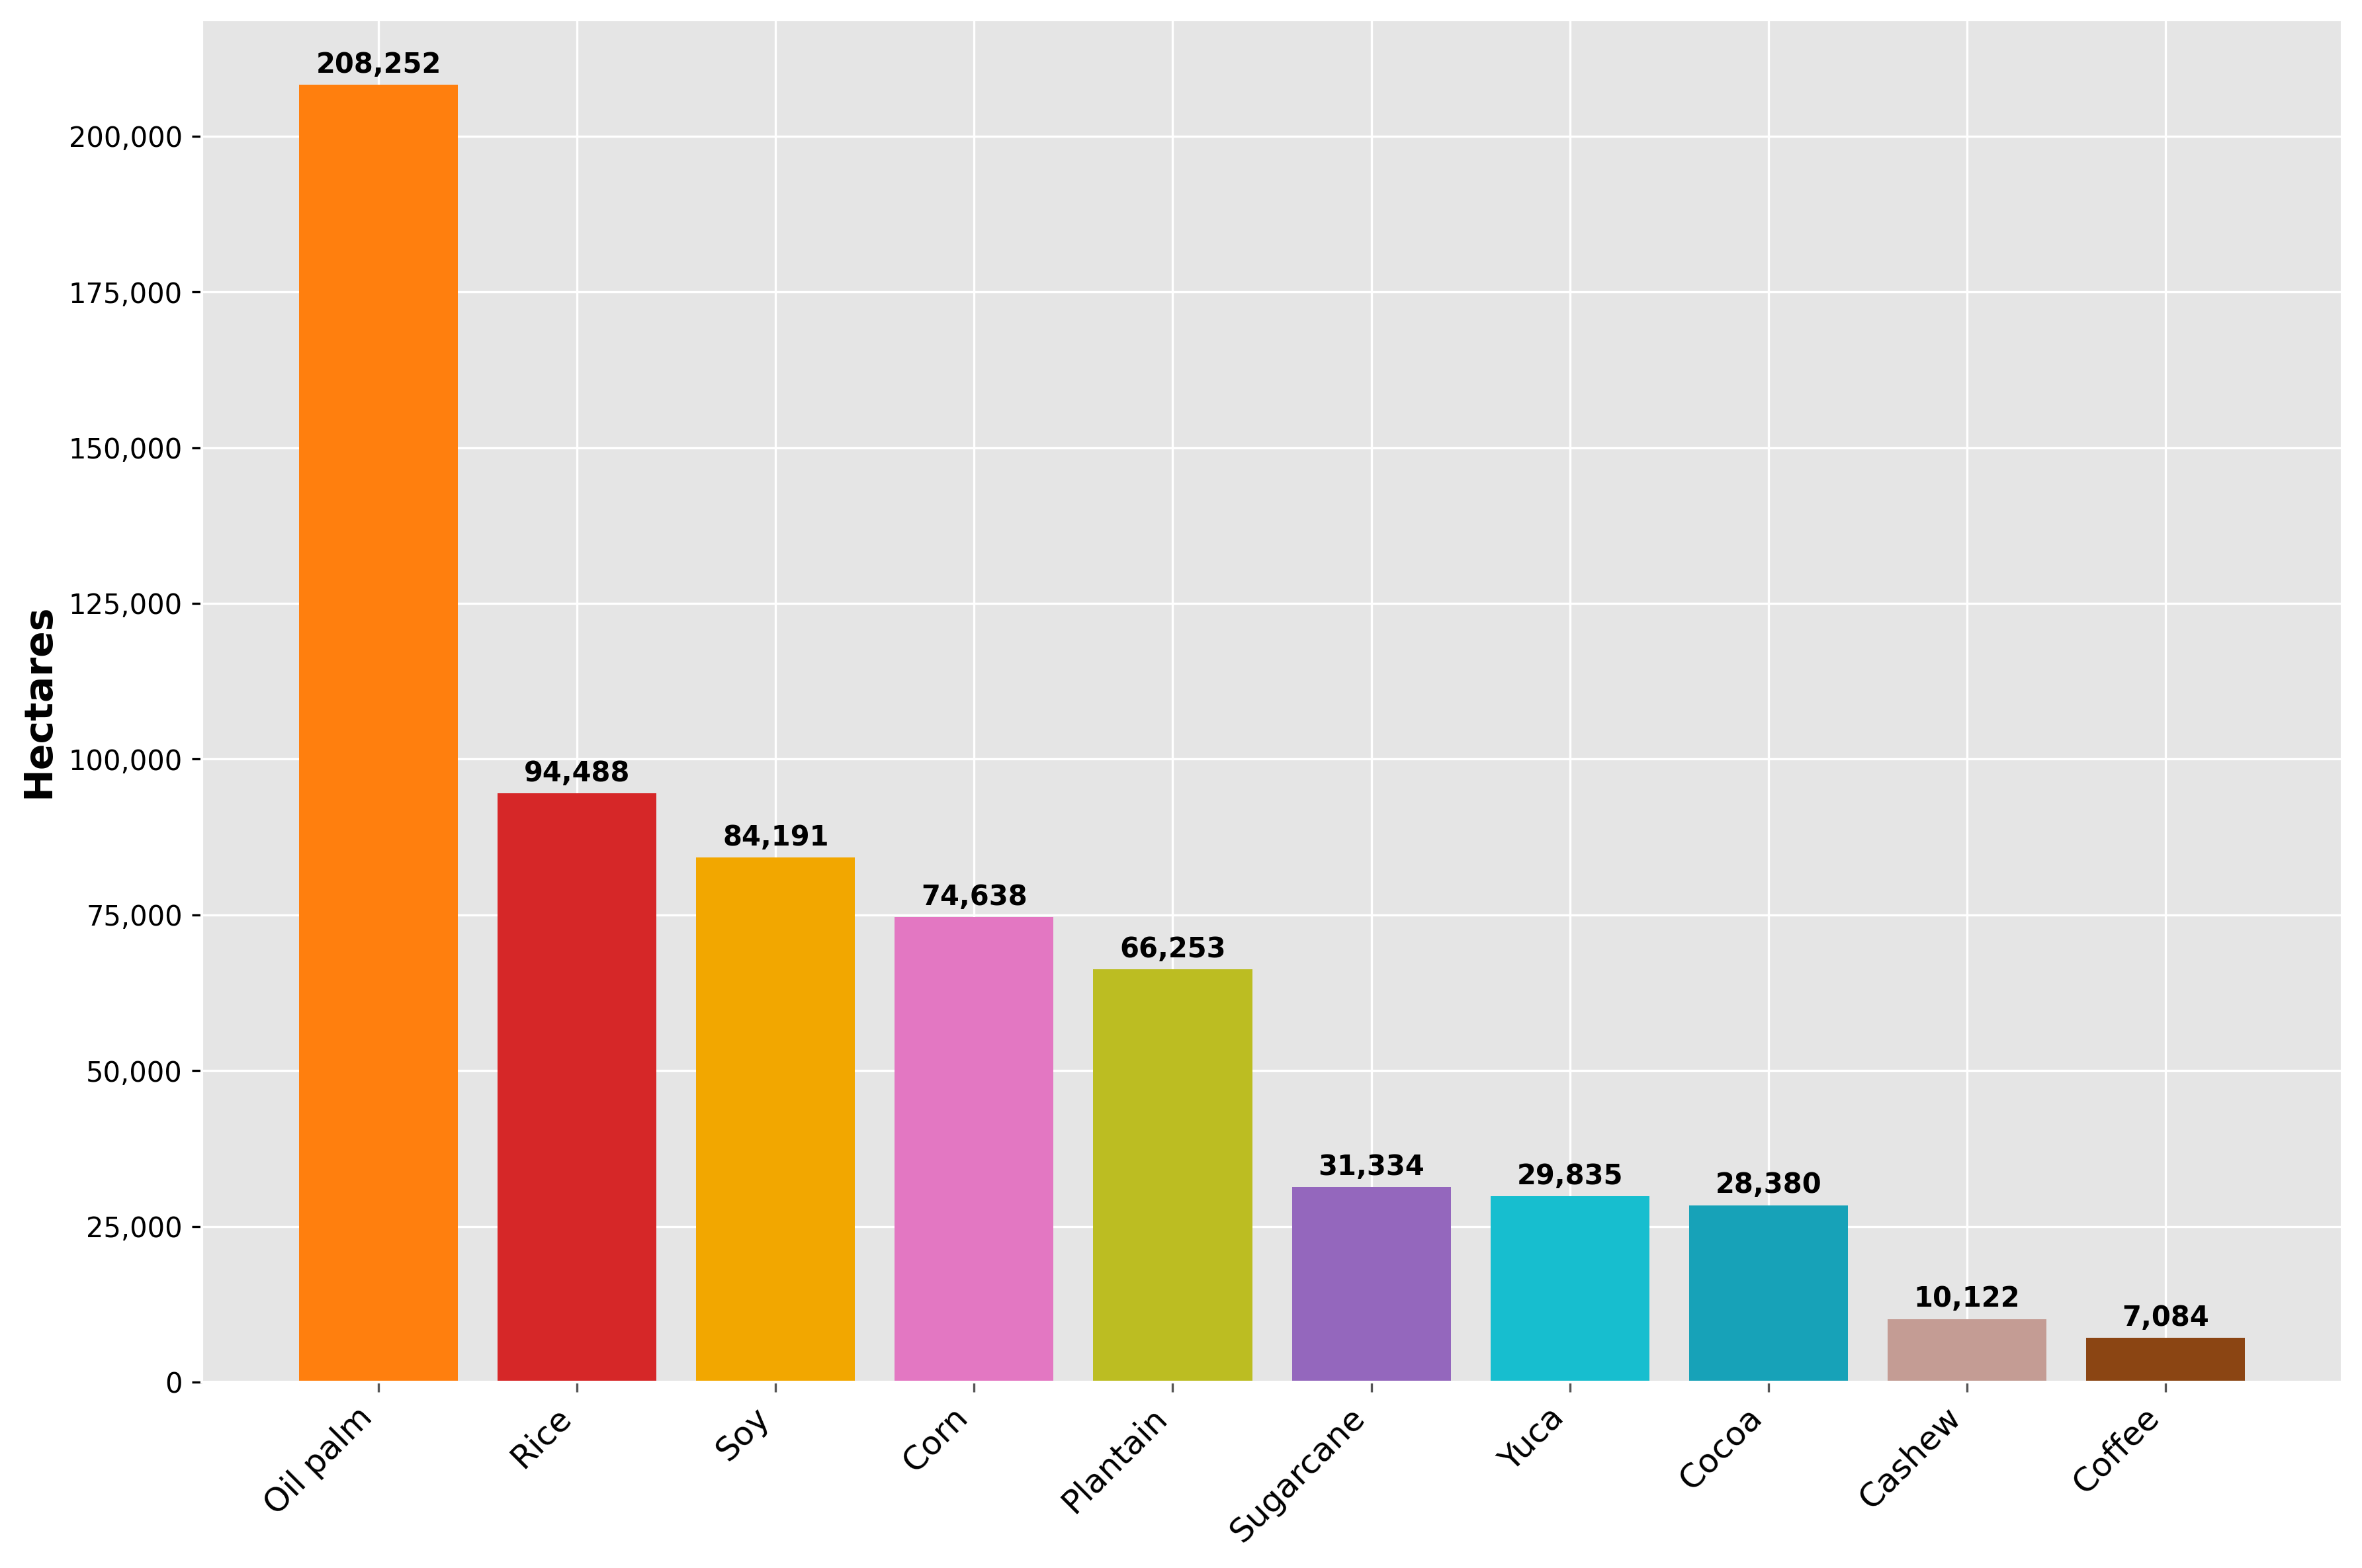

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Aplicar estilo ggplot con fondo oscuro
plt.style.use('ggplot')

# Cargar el archivo Excel
file_path = '/content/drive/MyDrive/BID/datos_inicio/cultivos_colombia.xlsx'
df = pd.read_excel(file_path)

# Filtrar los datos para el año 2023 y seleccionar las columnas relevantes
df_2023 = df[df['Año'] == 2023][['Cultivo', 'Área']]

# Agrupar por cultivo y sumar las áreas sembradas
df_2023_grouped = df_2023.groupby('Cultivo').agg({'Área': 'sum'}).reset_index()

# Seleccionar los 10 cultivos con mayor área sembrada
top_10_cultivos = df_2023_grouped.nlargest(10, 'Área')

# Mapeo de traducciones de cultivos del español al inglés
traducciones = {
    "PALMA DE ACEITE": "Oil palm",
    "MAÍZ": "Corn",
    "ARROZ": "Rice",
    "SOYA": "Soy",
    "PLÁTANO": "Plantain",
    "CAÑA": "Sugarcane",
    "YUCA": "Yuca",
    "CACAO": "Cocoa",
    "MARAÑÓN": "Cashew",
    "CAFÉ": "Coffee"
}

# Reemplazar las etiquetas en la columna 'Cultivo'
top_10_cultivos['Cultivo'] = top_10_cultivos['Cultivo'].replace(traducciones)

# Paleta de colores personalizada (igual al gráfico anterior)
colors = {
    'Açaí': '#1f77b4',  # azul
    'Cotton': '#2ca02c',  # verde
    'Rice': '#d62728',  # rojo
    'Sugarcane': '#9467bd',  # morado
    'Oil palm': '#ff7f0e',  # naranja
    'Bean': '#8c564b',  # marrón
    'Corn': '#e377c2',  # rosa
    'Yuca': '#17becf',  # cyan
    'Soy': '#f2a700',  # amarillo
    'Sorghum': '#7f7f7f',  # gris
    'Plantain': '#bcbd22',  # verde oliva
    'Cocoa': '#17a2b8',  # azul acero
    'Cashew': '#c49c94',  # marrón claro
    'Coffee': '#8b4513'  # marrón oscuro (siena quemada)
    }

# Asignar colores a las barras según el cultivo
bar_colors = [colors[cultivo] for cultivo in top_10_cultivos['Cultivo']]

# Establecer estilo
#sns.set_style("darkgrid")  # Ajuste para mantener un fondo con cuadrículas claras en un entorno oscuro

# Crear gráfico de barras
plt.figure(figsize=(12, 8), dpi=300)
bars = plt.bar(top_10_cultivos['Cultivo'], top_10_cultivos['Área'], color=bar_colors)

# Añadir etiquetas y título
plt.ylabel('Hectares', fontsize=14, fontweight='bold', color='black')  # Etiquetas en color blanco

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=12, color='black')  # Etiquetas del eje x en color blanco

# Formatear eje y con separadores de miles
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.label.set_color('black')  # Color de la etiqueta del eje Y
plt.gca().tick_params(axis='y', colors='black')  # Color de los números del eje Y

# Añadir etiquetas de valores encima de las barras con separadores de miles
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Ajustar el diseño para una mejor presentación
plt.tight_layout()

# Guardar la gráfica como imagen PNG
plt.savefig('/content/drive/MyDrive/BID/figuras/cultivos_colombiatop.png', dpi=300)

# Mostrar la gráfica
plt.show()
